In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

# import warnings
# warnings.filterwarnings("ignore")

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
train_data= pd.read_csv("C:/Users/joshi/Downloads/test (2).csv", parse_dates = ['date'])
train_data

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [5]:
test_data= pd.read_csv("C:/Users/joshi/Downloads/train.csv (1)/train.csv", parse_dates = ['date'])
test_data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [6]:
data= pd.concat([train_data, test_data],sort= False)
data

,id,date,store,item,sales
0,0.0,2018-01-01,1,1,NaN
1,1.0,2018-01-02,1,1,NaN
2,2.0,2018-01-03,1,1,NaN
3,3.0,2018-01-04,1,1,NaN
4,4.0,2018-01-05,1,1,NaN
...,...,...,...,...,...
912995,NaN,2017-12-27,10,50,63.0
912996,NaN,2017-12-28,10,50,59.0
912997,NaN,2017-12-29,10,50,74.0
912998,NaN,2017-12-30,10,50,62.0


In [7]:
data.shape


(958000, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 912999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      45000 non-null   float64       
 1   date    958000 non-null  datetime64[ns]
 2   store   958000 non-null  int64         
 3   item    958000 non-null  int64         
 4   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.9 MB


In [9]:
data.isnull().sum()

id       913000
date          0
store         0
item          0
sales     45000
dtype: int64

In [10]:
data[data.duplicated()]


,id,date,store,item,sales


In [11]:
data['store'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [12]:
data['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [13]:
data.groupby(["store"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})
                            

sales                                                    
       count        sum       mean median        std  min    max
store                                                           
1      91300  4315603.0  47.268379   44.0  24.006252  1.0  155.0
2      91300  6120128.0  67.033165   62.0  33.595810  3.0  231.0
3      91300  5435144.0  59.530602   55.0  29.974102  3.0  196.0
4      91300  5012639.0  54.902946   51.0  27.733097  4.0  186.0
5      91300  3631016.0  39.770164   37.0  20.365757  2.0  130.0
6      91300  3627670.0  39.733516   37.0  20.310451  0.0  134.0
7      91300  3320009.0  36.363735   34.0  18.684825  1.0  122.0
8      91300  5856169.0  64.142048   60.0  32.231751  4.0  204.0
9      91300  5025976.0  55.049025   51.0  27.832186  4.0  195.0
10     91300  5360158.0  58.709288   54.0  29.554994  3.0  187.0

In [14]:
data.groupby(['store'])['item'].nunique()


store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [15]:
data.groupby(["store"]).agg({"sales": ["sum"]})

,sales
,sum
store,
1,4315603.0
2,6120128.0
3,5435144.0
4,5012639.0
5,3631016.0
6,3627670.0
7,3320009.0
8,5856169.0


In [16]:
data.groupby(['store','item']).agg({'sales':[ 'sum', 'mean', 'median', 'std']})

sales                             
                 sum       mean median        std
store item                                       
1     1      36468.0  19.971522   19.0   6.741022
      2      97050.0  53.148959   52.0  15.005779
      3      60638.0  33.208105   33.0  10.072529
      4      36440.0  19.956188   20.0   6.640618
      5      30335.0  16.612815   16.0   5.672102
...              ...        ...    ...        ...
10    46    120601.0  66.046550   65.0  18.114991
      47     45204.0  24.755750   24.0   7.924820
      48    105570.0  57.814896   57.0  15.898538
      49     60317.0  33.032311   32.0  10.091610
      50    135192.0  74.037240   73.0  19.937566

[500 rows x 4 columns]

In [17]:
train_data.date.nunique()

90

In [18]:
indexes_train = []


In [19]:
for i in range(train_data.store.nunique()*train_data.item.nunique()):
    indexes_train = np.append(indexes_train, np.linspace(0, train_data.date.nunique()-1, train_data.date.nunique(), dtype=int))
    i=+1
indexes_train

array([ 0.,  1.,  2., ..., 87., 88., 89.])

In [20]:
indexes_train.shape

(45000,)

In [21]:
train_data["indexes"]=indexes_train
train_data

,id,date,store,item,indexes
0,0,2018-01-01,1,1,0.0
1,1,2018-01-02,1,1,1.0
2,2,2018-01-03,1,1,2.0
3,3,2018-01-04,1,1,3.0
4,4,2018-01-05,1,1,4.0
...,...,...,...,...,...
44995,44995,2018-03-27,10,50,85.0
44996,44996,2018-03-28,10,50,86.0
44997,44997,2018-03-29,10,50,87.0
44998,44998,2018-03-30,10,50,88.0


In [22]:
indexes_test = []

In [23]:
for i in range(test_data.store.nunique()*test_data.item.nunique()):
    indexes_test = np.append(indexes_test, np.linspace(0, test_data.date.nunique()-1, test_data.date.nunique(), dtype=int))
    i=+1
indexes_test

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.823e+03, 1.824e+03,
       1.825e+03])

In [24]:
indexes_test.shape

(913000,)

In [25]:
test_data["indexes"]=indexes_test
test_data


,date,store,item,sales,indexes
0,2013-01-01,1,1,13,0.0
1,2013-01-02,1,1,11,1.0
2,2013-01-03,1,1,14,2.0
3,2013-01-04,1,1,13,3.0
4,2013-01-05,1,1,10,4.0
...,...,...,...,...,...
912995,2017-12-27,10,50,63,1821.0
912996,2017-12-28,10,50,59,1822.0
912997,2017-12-29,10,50,74,1823.0
912998,2017-12-30,10,50,62,1824.0


In [26]:
data= pd.concat([train_data, test_data], sort= False)
data

,id,date,store,item,indexes,sales
0,0.0,2018-01-01,1,1,0.0,NaN
1,1.0,2018-01-02,1,1,1.0,NaN
2,2.0,2018-01-03,1,1,2.0,NaN
3,3.0,2018-01-04,1,1,3.0,NaN
4,4.0,2018-01-05,1,1,4.0,NaN
...,...,...,...,...,...,...
912995,NaN,2017-12-27,10,50,1821.0,63.0
912996,NaN,2017-12-28,10,50,1822.0,59.0
912997,NaN,2017-12-29,10,50,1823.0,74.0
912998,NaN,2017-12-30,10,50,1824.0,62.0


In [27]:
hour = 60*60 # 1 hour 60*60 seconds...
day  = 24*hour
week = 7*day
year = 365.2425*day

In [28]:
df1=data.copy()

In [30]:
df1["index_second"]= df1["indexes"]*day #seconds difference compared to the first day
df1

,id,date,store,item,indexes,sales,index_second
0,0.0,2018-01-01,1,1,0.0,NaN,0.0
1,1.0,2018-01-02,1,1,1.0,NaN,86400.0
2,2.0,2018-01-03,1,1,2.0,NaN,172800.0
3,3.0,2018-01-04,1,1,3.0,NaN,259200.0
4,4.0,2018-01-05,1,1,4.0,NaN,345600.0
...,...,...,...,...,...,...,...
912995,NaN,2017-12-27,10,50,1821.0,63.0,157334400.0
912996,NaN,2017-12-28,10,50,1822.0,59.0,157420800.0
912997,NaN,2017-12-29,10,50,1823.0,74.0,157507200.0
912998,NaN,2017-12-30,10,50,1824.0,62.0,157593600.0


In [31]:
df1["YEAR_index_norm"] = 2 * np.pi * df1["index_second"] / year
df1["YEAR_cos_index"] = np.cos(df1["YEAR_index_norm"])
df1["YEAR_sin_index"] = np.sin(df1["YEAR_index_norm"])
df1

,id,date,store,item,indexes,sales,index_second,YEAR_index_norm,YEAR_cos_index,YEAR_sin_index
0,0.0,2018-01-01,1,1,0.0,NaN,0.0,0.000000,1.000000,0.000000
1,1.0,2018-01-02,1,1,1.0,NaN,86400.0,0.017203,0.999852,0.017202
2,2.0,2018-01-03,1,1,2.0,NaN,172800.0,0.034406,0.999408,0.034399
3,3.0,2018-01-04,1,1,3.0,NaN,259200.0,0.051608,0.998669,0.051585
4,4.0,2018-01-05,1,1,4.0,NaN,345600.0,0.068811,0.997633,0.068757
...,...,...,...,...,...,...,...,...,...,...
912995,NaN,2017-12-27,10,50,1821.0,63.0,157334400.0,31.326257,0.995982,-0.089549
912996,NaN,2017-12-28,10,50,1822.0,59.0,157420800.0,31.343460,0.997375,-0.072403
912997,NaN,2017-12-29,10,50,1823.0,74.0,157507200.0,31.360663,0.998473,-0.055236
912998,NaN,2017-12-30,10,50,1824.0,62.0,157593600.0,31.377865,0.999276,-0.038052


<AxesSubplot:>

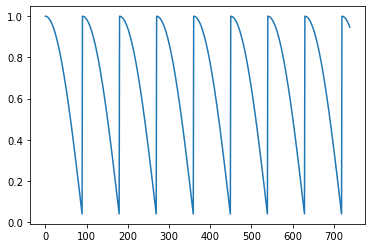

In [32]:
#for example, cos for 2 year for store=1, item=1...
df1.iloc[0:740, 8].plot()

<AxesSubplot:>

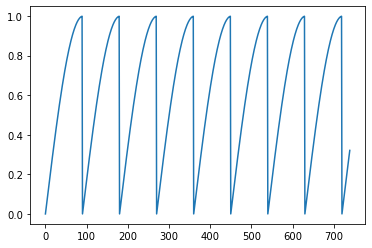

In [36]:
#for example, sin for 2 year for store=1, item=1...
df1.iloc[0:740, 9].plot()

In [37]:
df2 = df1.drop(["indexes","index_second","YEAR_index_norm"], axis=1) #lets remove unnecessary features
df2.head()

,id,date,store,item,sales,YEAR_cos_index,YEAR_sin_index
0,0.0,2018-01-01,1,1,NaN,1.000000,0.000000
1,1.0,2018-01-02,1,1,NaN,0.999852,0.017202
2,2.0,2018-01-03,1,1,NaN,0.999408,0.034399
3,3.0,2018-01-04,1,1,NaN,0.998669,0.051585
4,4.0,2018-01-05,1,1,NaN,0.997633,0.068757


In [38]:
def create_date_time_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.date.dt.dayofweek
    df['quarter'] = df.date.dt.quarter
    df['month'] = df.date.dt.month
    df['year'] = df.date.dt.year
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofmonth'] = df.date.dt.day
    df['weekofyear'] = df.date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [39]:
create_date_time_features(df2)

,id,date,store,item,sales,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,0.0,2018-01-01,1,1,NaN,1.000000,0.000000,0,1,1,2018,1,1,1,0
1,1.0,2018-01-02,1,1,NaN,0.999852,0.017202,1,1,1,2018,2,2,1,0
2,2.0,2018-01-03,1,1,NaN,0.999408,0.034399,2,1,1,2018,3,3,1,0
3,3.0,2018-01-04,1,1,NaN,0.998669,0.051585,3,1,1,2018,4,4,1,0
4,4.0,2018-01-05,1,1,NaN,0.997633,0.068757,4,1,1,2018,5,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,NaN,2017-12-27,10,50,63.0,0.995982,-0.089549,2,4,12,2017,361,27,52,0
912996,NaN,2017-12-28,10,50,59.0,0.997375,-0.072403,3,4,12,2017,362,28,52,0
912997,NaN,2017-12-29,10,50,74.0,0.998473,-0.055236,4,4,12,2017,363,29,52,0
912998,NaN,2017-12-30,10,50,62.0,0.999276,-0.038052,5,4,12,2017,364,30,52,0


In [40]:
df2

,id,date,store,item,sales,YEAR_cos_index,YEAR_sin_index
0,0.0,2018-01-01,1,1,NaN,1.000000,0.000000
1,1.0,2018-01-02,1,1,NaN,0.999852,0.017202
2,2.0,2018-01-03,1,1,NaN,0.999408,0.034399
3,3.0,2018-01-04,1,1,NaN,0.998669,0.051585
4,4.0,2018-01-05,1,1,NaN,0.997633,0.068757
...,...,...,...,...,...,...,...
912995,NaN,2017-12-27,10,50,63.0,0.995982,-0.089549
912996,NaN,2017-12-28,10,50,59.0,0.997375,-0.072403
912997,NaN,2017-12-29,10,50,74.0,0.998473,-0.055236
912998,NaN,2017-12-30,10,50,62.0,0.999276,-0.038052


In [41]:
df3 = df2.copy()


In [42]:
df3= create_date_time_features(df3)
df3

,id,date,store,item,sales,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,0.0,2018-01-01,1,1,NaN,1.000000,0.000000,0,1,1,2018,1,1,1,0
1,1.0,2018-01-02,1,1,NaN,0.999852,0.017202,1,1,1,2018,2,2,1,0
2,2.0,2018-01-03,1,1,NaN,0.999408,0.034399,2,1,1,2018,3,3,1,0
3,3.0,2018-01-04,1,1,NaN,0.998669,0.051585,3,1,1,2018,4,4,1,0
4,4.0,2018-01-05,1,1,NaN,0.997633,0.068757,4,1,1,2018,5,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,NaN,2017-12-27,10,50,63.0,0.995982,-0.089549,2,4,12,2017,361,27,52,0
912996,NaN,2017-12-28,10,50,59.0,0.997375,-0.072403,3,4,12,2017,362,28,52,0
912997,NaN,2017-12-29,10,50,74.0,0.998473,-0.055236,4,4,12,2017,363,29,52,0
912998,NaN,2017-12-30,10,50,62.0,0.999276,-0.038052,5,4,12,2017,364,30,52,0


In [43]:
df4= df3.copy()

In [44]:
def lag_features(df, lags):
    for lag in lags:
        df['sales_lag_' + str(lag)] = df.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(lag))
        df.fillna(0, inplace=True)
    return df

In [45]:
lag_features(df4, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])
df4

,id,date,store,item,sales,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728
0,0.0,2018-01-01,1,1,0.0,1.000000,0.000000,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2018-01-02,1,1,0.0,0.999852,0.017202,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2018-01-03,1,1,0.0,0.999408,0.034399,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2018-01-04,1,1,0.0,0.998669,0.051585,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2018-01-05,1,1,0.0,0.997633,0.068757,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,0.0,2017-12-27,10,50,63.0,0.995982,-0.089549,2,4,12,...,80.0,72.0,84.0,79.0,79.0,104.0,91.0,43.0,80.0,51.0
912996,0.0,2017-12-28,10,50,59.0,0.997375,-0.072403,3,4,12,...,82.0,89.0,90.0,78.0,89.0,89.0,122.0,68.0,91.0,44.0
912997,0.0,2017-12-29,10,50,74.0,0.998473,-0.055236,4,4,12,...,90.0,97.0,94.0,97.0,96.0,98.0,112.0,63.0,101.0,59.0
912998,0.0,2017-12-30,10,50,62.0,0.999276,-0.038052,5,4,12,...,103.0,97.0,97.0,93.0,92.0,92.0,119.0,64.0,113.0,63.0


In [46]:
def roll_mean_features(df, windows):
    for window in windows:
        df['sales_roll_mean_' + str(window)] = df.groupby(["store", "item"])['sales']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
        df.fillna(0, inplace=True)
    return df

In [47]:
df5= df4.copy()

In [48]:
df5= roll_mean_features(df5, [365, 546])
df5

,id,date,store,item,sales,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_roll_mean_365,sales_roll_mean_546
0,0.0,2018-01-01,1,1,0.0,1.000000,0.000000,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1.0,2018-01-02,1,1,0.0,0.999852,0.017202,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,2.0,2018-01-03,1,1,0.0,0.999408,0.034399,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,3.0,2018-01-04,1,1,0.0,0.998669,0.051585,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,4.0,2018-01-05,1,1,0.0,0.997633,0.068757,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,0.0,2017-12-27,10,50,63.0,0.995982,-0.089549,2,4,12,...,84.0,79.0,79.0,104.0,91.0,43.0,80.0,51.0,90.758219,82.243100
912996,0.0,2017-12-28,10,50,59.0,0.997375,-0.072403,3,4,12,...,90.0,78.0,89.0,89.0,122.0,68.0,91.0,44.0,90.802383,82.284889
912997,0.0,2017-12-29,10,50,74.0,0.998473,-0.055236,4,4,12,...,94.0,97.0,96.0,98.0,112.0,63.0,101.0,59.0,90.844665,82.326752
912998,0.0,2017-12-30,10,50,62.0,0.999276,-0.038052,5,4,12,...,97.0,93.0,92.0,92.0,119.0,64.0,113.0,63.0,90.883156,82.368957


In [49]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    dataframe.fillna(0, inplace=True)
    return dataframe

In [50]:
df6= df5.copy()

In [51]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df6= ewm_features(df6, alphas, lags)

df6.head()

,id,date,store,item,sales,YEAR_cos_index,YEAR_sin_index,dayofweek,quarter,month,...,sales_ewm_alpha_07_lag_728,sales_ewm_alpha_05_lag_91,sales_ewm_alpha_05_lag_98,sales_ewm_alpha_05_lag_105,sales_ewm_alpha_05_lag_112,sales_ewm_alpha_05_lag_180,sales_ewm_alpha_05_lag_270,sales_ewm_alpha_05_lag_365,sales_ewm_alpha_05_lag_546,sales_ewm_alpha_05_lag_728
0,0.0,2018-01-01,1,1,0.0,1.000000,0.000000,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2018-01-02,1,1,0.0,0.999852,0.017202,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2018-01-03,1,1,0.0,0.999408,0.034399,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2018-01-04,1,1,0.0,0.998669,0.051585,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2018-01-05,1,1,0.0,0.997633,0.068757,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 912999
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           958000 non-null  float64       
 1   date                         958000 non-null  datetime64[ns]
 2   store                        958000 non-null  int64         
 3   item                         958000 non-null  int64         
 4   sales                        958000 non-null  float64       
 5   YEAR_cos_index               958000 non-null  float64       
 6   YEAR_sin_index               958000 non-null  float64       
 7   dayofweek                    958000 non-null  int64         
 8   quarter                      958000 non-null  int64         
 9   month                        958000 non-null  int64         
 10  year                         958000 non-null  int64         
 11  dayofyear                 

In [53]:
df6.shape

(958000, 72)

In [54]:
df7 = pd.get_dummies(df6, columns=['store', 'item', 'dayofweek', "quarter", 'month', "year", "season"])
df7.shape

(958000, 158)

In [55]:
df7['sales']= np.log1p(df7["sales"].values)
df7.head()

,id,date,sales,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,0.0,2018-01-01,0.0,1.000000,0.000000,1,1,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1,1.0,2018-01-02,0.0,0.999852,0.017202,2,2,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,2.0,2018-01-03,0.0,0.999408,0.034399,3,3,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
3,3.0,2018-01-04,0.0,0.998669,0.051585,4,4,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,4.0,2018-01-05,0.0,0.997633,0.068757,5,5,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0


In [56]:
df_model= df7.copy()

In [57]:
df_model = df_model.sort_values("date").reset_index(drop = True)

In [58]:
train= df_model.loc[(df_model["date"] <  "2017-01-01"), :]

val=   df_model.loc[(df_model["date"] >= "2017-01-01") & (df_model["date"] < "2017-04-01"), :]

In [59]:
train


,id,date,sales,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,0.0,2013-01-01,3.258097,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,0.0,2013-01-01,2.639057,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0.0,2013-01-01,3.433987,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,0.0,2013-01-01,3.044522,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,0.0,2013-01-01,3.218876,1.000000,0.000000,1,1,1,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730495,0.0,2016-12-31,3.850148,0.999861,-0.016686,366,31,52,76.0,94.0,...,0,0,0,1,0,0,1,0,0,0
730496,0.0,2016-12-31,3.258097,0.999861,-0.016686,366,31,52,42.0,36.0,...,0,0,0,1,0,0,1,0,0,0
730497,0.0,2016-12-31,3.401197,0.999861,-0.016686,366,31,52,38.0,44.0,...,0,0,0,1,0,0,1,0,0,0
730498,0.0,2016-12-31,3.218876,0.999861,-0.016686,366,31,52,44.0,34.0,...,0,0,0,1,0,0,1,0,0,0


In [60]:
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]]

In [61]:
X_train = train[cols]
Y_train = train['sales']

X_val = val[cols]
Y_val = val['sales']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((730500, 155), (730500,), (45000, 155), (45000,))

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras import metrics
# import tensorflow as tf

In [64]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))#The Input Layer

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))#The Hidden Layers

NN_model.add(Dropout(0.2))#Dropout layer

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))#The Output Layer

#Compile the network
NN_model.compile(loss=tf.keras.losses.mae, optimizer="adam", metrics=['mae'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19968     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 184,833
Trainable params: 184,833
Non-trai

In [66]:
#Define a checkpoint callback :
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [67]:
#Train the model
NN_model.fit(X_train.values, Y_train.values, epochs=2, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/2
18255/18263 [============================>.] - ETA: 0s - loss: 0.2065 - mae: 0.2065
Epoch 1: val_loss improved from inf to 0.12145, saving model to Weights-001--0.12145.hdf5
18263/18263 [==============================] - 127s 7ms/step - loss: 0.2064 - mae: 0.2064 - val_loss: 0.1215 - val_mae: 0.1215
Epoch 2/2
18256/18263 [============================>.] - ETA: 0s - loss: 0.1531 - mae: 0.1531
Epoch 2: val_loss did not improve from 0.12145
18263/18263 [==============================] - 114s 6ms/step - loss: 0.1531 - mae: 0.1531 - val_loss: 0.1347 - val_mae: 0.1347


In [69]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

In [70]:
print("VALID SMAPE:", smape(np.expm1(NN_model.predict(X_val).flatten()), np.expm1(Y_val)))

1407/1407 [==============================] - 4s 3ms/step
VALID SMAPE: 14.067950410429967


In [71]:
print("VALID SMAPE:", smape(np.expm1(NN_model.predict(X_val).flatten()), np.expm1(Y_val)))

1407/1407 [==============================] - 4s 3ms/step
VALID SMAPE: 14.067950410429967


In [72]:
df_final_model= df7.copy()
train = df_final_model.loc[(df_final_model["date"] <  "2018-01-01"), :]
Y_train = train['sales']
X_train = train[cols]

test = df_final_model.loc[(df_final_model["date"] >=  "2018-01-01"), :]
X_test = test[cols]

In [73]:
df_final_model

,id,date,sales,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,0.0,2018-01-01,0.000000,1.000000,0.000000,1,1,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1,1.0,2018-01-02,0.000000,0.999852,0.017202,2,2,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,2.0,2018-01-03,0.000000,0.999408,0.034399,3,3,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
3,3.0,2018-01-04,0.000000,0.998669,0.051585,4,4,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,4.0,2018-01-05,0.000000,0.997633,0.068757,5,5,1,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,0.0,2017-12-27,4.158883,0.995982,-0.089549,361,27,52,80.0,72.0,...,0,0,0,0,1,0,1,0,0,0
912996,0.0,2017-12-28,4.094345,0.997375,-0.072403,362,28,52,82.0,89.0,...,0,0,0,0,1,0,1,0,0,0
912997,0.0,2017-12-29,4.317488,0.998473,-0.055236,363,29,52,90.0,97.0,...,0,0,0,0,1,0,1,0,0,0
912998,0.0,2017-12-30,4.143135,0.999276,-0.038052,364,30,52,103.0,97.0,...,0,0,0,0,1,0,1,0,0,0


In [74]:
X_train

,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,1.000000,0.000000,1,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,0.999852,0.017202,2,2,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0.999408,0.034399,3,3,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
3,0.998669,0.051585,4,4,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,0.997633,0.068757,5,5,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,0.995982,-0.089549,361,27,52,80.0,72.0,84.0,79.0,79.0,...,0,0,0,0,1,0,1,0,0,0
912996,0.997375,-0.072403,362,28,52,82.0,89.0,90.0,78.0,89.0,...,0,0,0,0,1,0,1,0,0,0
912997,0.998473,-0.055236,363,29,52,90.0,97.0,94.0,97.0,96.0,...,0,0,0,0,1,0,1,0,0,0
912998,0.999276,-0.038052,364,30,52,103.0,97.0,97.0,93.0,92.0,...,0,0,0,0,1,0,1,0,0,0


In [75]:
X_test

,YEAR_cos_index,YEAR_sin_index,dayofyear,dayofmonth,weekofyear,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,season_0,season_1,season_2,season_3
0,1.000000,0.000000,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1,0.999852,0.017202,2,2,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,0.999408,0.034399,3,3,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
3,0.998669,0.051585,4,4,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,0.997633,0.068757,5,5,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.108347,0.994113,86,27,13,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
44996,0.091230,0.995830,87,28,13,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
44997,0.074087,0.997252,88,29,13,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
44998,0.056921,0.998379,89,30,13,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0


In [76]:
test_predictions = NN_model.predict(X_test).flatten()

1407/1407 [==============================] - 4s 3ms/step


In [77]:
test_results = pd.DataFrame(data={'Test Predictions':np.expm1(test_predictions)})
test_results

,Test Predictions
0,8.144097
1,8.258560
2,8.244172
3,8.276999
4,8.361211
...,...
44995,11.063398
44996,10.914703
44997,11.115021
44998,11.696063


In [78]:
submission_df = test.loc[:, ['id', 'sales']]
submission_df['sales'] = np.expm1(test_predictions)
submission_df['id'] = submission_df.id.astype(int)
submission_df.head()

,id,sales
0,0,8.144097
1,1,8.258560
2,2,8.244172
3,3,8.276999
4,4,8.361211


In [80]:
submission_df.to_csv('submission.csv', index=False)